In [814]:
from matplotlib import pyplot as plt

def plotCurve(x,y,xlable,ylabel,clabel):
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    ax.plot(x,y,label=clabel)
    ax.set_xlabel(xlable)
    ax.set_ylabel(ylabel)
    plt.grid()
    ax.legend()
    plt.show()

In [815]:
import pandas as pd

#import dataset from local device
url = "./train_data.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20651 entries, 0 to 20650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryCode  20651 non-null  object
 1   ItemCode      20651 non-null  int64 
 2   DateID        20651 non-null  object
 3   DailySales    20651 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 645.5+ KB


In [816]:
df.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,1071115,12/19/2021,1
1,category_4,210652,2/13/2022,1
2,category_2,877624,12/19/2021,1
3,category_1,371104,12/19/2021,3
4,category_1,1090294,12/19/2021,3


In [817]:
from datetime import datetime


df['date_format'] = pd.to_datetime(df['DateID'], format = '%m/%d/%Y',  errors = 'coerce')
df['year']=df['date_format'].dt.year
df['month']=df['date_format'].dt.month
df['week']= df['date_format'].dt.weekofyear
# df['day']=df['date_format'].dt.day


df['CategoryCode']=df.CategoryCode.str.split(pat='_',expand=True)[1]

df.head(10)

C:\Users\Abi\AppData\Local\Temp/ipykernel_19836/200453647.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']= df['date_format'].dt.weekofyear


,CategoryCode,ItemCode,DateID,DailySales,date_format,year,month,week
0,2,1071115,12/19/2021,1,2021-12-19,2021,12,50
1,4,210652,2/13/2022,1,2022-02-13,2022,2,6
2,2,877624,12/19/2021,1,2021-12-19,2021,12,50
3,1,371104,12/19/2021,3,2021-12-19,2021,12,50
4,1,1090294,12/19/2021,3,2021-12-19,2021,12,50
5,1,145330,12/19/2021,3,2021-12-19,2021,12,50
6,2,1105027,2/13/2022,3,2022-02-13,2022,2,6
7,2,174436,2/13/2022,6,2022-02-13,2022,2,6
8,2,75886,12/19/2021,2,2021-12-19,2021,12,50
9,1,76399,12/19/2021,7,2021-12-19,2021,12,50


In [818]:
discrete_features = df.drop(columns=["DailySales","DateID","date_format"]).dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df.drop(columns=["DailySales","DateID","date_format"]), df.DailySales, discrete_features)
mi_scores.sort_values(ascending=False)

ItemCode        0.297063
CategoryCode    0.047310
year            0.003356
month           0.000000
week            0.000000
Name: MI Scores, dtype: float64

In [819]:
week_df = pd.DataFrame(columns = ['CategoryCode', 'ItemCode', 'Week','WeeklySales'])

gkk = df.groupby(['week','ItemCode'])
  
# Print the first value in each group
gkk.first()

for i,j in gkk:
  # print(i,j)
  sum = 0
  dict ={}
  for k in range(j.shape[0]):
    sum = sum + (int((j.iloc[[k]])['DailySales']))
  if  39 <= int((j.iloc[[k]])['week']) <=52:
    week = int((j.iloc[[k]])['week']) -38
  else:
    week = 14 + int((j.iloc[[k]])['week'])
  dict = {'CategoryCode': int((j.iloc[[k]])['CategoryCode']),'ItemCode':int((j.iloc[[k]])['ItemCode']) ,'Week':week,'WeeklySales' : sum}
  week_df=week_df.append(dict,ignore_index=True)

week_df

,CategoryCode,ItemCode,Week,WeeklySales
0,1,3418,15,83
1,1,3427,15,66
2,3,7666,15,15
3,2,9925,15,8
4,3,16936,15,74
...,...,...,...,...
4008,3,1101661,14,31
4009,2,1103056,14,14
4010,2,1105009,14,3
4011,2,1105018,14,15


In [820]:
df_promo = pd.read_csv("./promotion_data.csv")
df_promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ItemCode            314 non-null    int64 
 1   PromotionStartDate  314 non-null    object
 2   PromotionEndDate    314 non-null    object
 3   DiscountValue       314 non-null    int64 
 4   DiscountType        314 non-null    object
 5   SellingPrice        314 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 14.8+ KB


In [821]:
df_promo.head()

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice
0,379249,12/3/2021,12/9/2021,10,Percentage,70
1,1066570,11/19/2021,11/25/2021,15,Percentage,45
2,124954,10/29/2021,11/4/2021,15,Percentage,210
3,35530,10/22/2021,10/28/2021,15,Percentage,60
4,1013335,1/21/2022,1/27/2022,10,Percentage,210


In [822]:
df_promo['date_format_start'] = pd.to_datetime(df_promo['PromotionStartDate'], format = '%m/%d/%Y',  errors = 'coerce')
df_promo['week_start']= df_promo['date_format_start'].dt.weekofyear
df_promo['date_format_end'] = pd.to_datetime(df_promo['PromotionEndDate'], format = '%m/%d/%Y',  errors = 'coerce')
df_promo['week_end']= df_promo['date_format_end'].dt.weekofyear
df_promo

C:\Users\Abi\AppData\Local\Temp/ipykernel_19836/3044308152.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_promo['week_start']= df_promo['date_format_start'].dt.weekofyear
C:\Users\Abi\AppData\Local\Temp/ipykernel_19836/3044308152.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_promo['week_end']= df_promo['date_format_end'].dt.weekofyear


,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,date_format_start,week_start,date_format_end,week_end
0,379249,12/3/2021,12/9/2021,10,Percentage,70,2021-12-03,48,2021-12-09,49
1,1066570,11/19/2021,11/25/2021,15,Percentage,45,2021-11-19,46,2021-11-25,47
2,124954,10/29/2021,11/4/2021,15,Percentage,210,2021-10-29,43,2021-11-04,44
3,35530,10/22/2021,10/28/2021,15,Percentage,60,2021-10-22,42,2021-10-28,43
4,1013335,1/21/2022,1/27/2022,10,Percentage,210,2022-01-21,3,2022-01-27,4
...,...,...,...,...,...,...,...,...,...,...
309,17287,12/10/2021,12/16/2021,10,Percentage,70,2021-12-10,49,2021-12-16,50
310,132028,10/29/2021,11/4/2021,10,Percentage,45,2021-10-29,43,2021-11-04,44
311,1076938,3/11/2022,3/17/2022,10,Percentage,80,2022-03-11,10,2022-03-17,11
312,17287,12/24/2021,12/30/2021,10,Percentage,70,2021-12-24,51,2021-12-30,52


In [823]:
df_promo["DiscountType"].replace("Percentage", 1,inplace=True)
df_promo["DiscountType"].replace("Amount", 1,inplace=True)
df_promo

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,date_format_start,week_start,date_format_end,week_end
0,379249,12/3/2021,12/9/2021,10,1,70,2021-12-03,48,2021-12-09,49
1,1066570,11/19/2021,11/25/2021,15,1,45,2021-11-19,46,2021-11-25,47
2,124954,10/29/2021,11/4/2021,15,1,210,2021-10-29,43,2021-11-04,44
3,35530,10/22/2021,10/28/2021,15,1,60,2021-10-22,42,2021-10-28,43
4,1013335,1/21/2022,1/27/2022,10,1,210,2022-01-21,3,2022-01-27,4
...,...,...,...,...,...,...,...,...,...,...
309,17287,12/10/2021,12/16/2021,10,1,70,2021-12-10,49,2021-12-16,50
310,132028,10/29/2021,11/4/2021,10,1,45,2021-10-29,43,2021-11-04,44
311,1076938,3/11/2022,3/17/2022,10,1,80,2022-03-11,10,2022-03-17,11
312,17287,12/24/2021,12/30/2021,10,1,70,2021-12-24,51,2021-12-30,52


In [824]:
# df_promo.loc[39 <= df_promo.week_start <= 52, 'week_start'] = df_promo.week_start

for index, row in df_promo.iterrows():
    if  39 <= row['week_end'] <=52:
        row['week_end'] = row['week_end'] -38
    else:
        row['week_end'] = 14 + row['week_end']
    df_promo.at[index,'Week'] = int(row['week_end'])

df_promo['Week'] = df_promo['Week'].astype('int64')   
df_promo


,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,date_format_start,week_start,date_format_end,week_end,Week
0,379249,12/3/2021,12/9/2021,10,1,70,2021-12-03,48,2021-12-09,49,11
1,1066570,11/19/2021,11/25/2021,15,1,45,2021-11-19,46,2021-11-25,47,9
2,124954,10/29/2021,11/4/2021,15,1,210,2021-10-29,43,2021-11-04,44,6
3,35530,10/22/2021,10/28/2021,15,1,60,2021-10-22,42,2021-10-28,43,5
4,1013335,1/21/2022,1/27/2022,10,1,210,2022-01-21,3,2022-01-27,4,18
...,...,...,...,...,...,...,...,...,...,...,...
309,17287,12/10/2021,12/16/2021,10,1,70,2021-12-10,49,2021-12-16,50,12
310,132028,10/29/2021,11/4/2021,10,1,45,2021-10-29,43,2021-11-04,44,6
311,1076938,3/11/2022,3/17/2022,10,1,80,2022-03-11,10,2022-03-17,11,25
312,17287,12/24/2021,12/30/2021,10,1,70,2021-12-24,51,2021-12-30,52,14


In [825]:
# df_promo_merge = pd.DataFrame(columns = [ 'ItemCode', 'Week','DiscountValue','DiscountType','SellingPrice'])

df_promo_merge = df_promo[['ItemCode','DiscountValue','DiscountType','SellingPrice' ,'Week']]
# dfff = pd.concat([week_df, df_promo_merge])
df_only_promo= pd.merge(week_df, df_promo_merge, on=['ItemCode','Week'])

In [826]:
df_only_promo['OnPromo']=1
df_only_promo.sample(5)

,CategoryCode,ItemCode,Week,WeeklySales,DiscountValue,DiscountType,SellingPrice,OnPromo
31,1,755584,18,62,10,1,70,1
2,4,753613,16,59,10,1,70,1
179,2,124954,9,23,15,1,210,1
10,2,1101553,16,8,10,1,150,1
158,1,379249,8,43,10,1,70,1


In [827]:
X = df_only_promo.drop(columns=['WeeklySales'])

discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, df_only_promo.WeeklySales, discrete_features)
mi_scores.sort_values(ascending=False)

ItemCode         0.161055
SellingPrice     0.158734
DiscountValue    0.100669
DiscountType     0.039614
CategoryCode     0.030855
OnPromo          0.005740
Week             0.000000
Name: MI Scores, dtype: float64

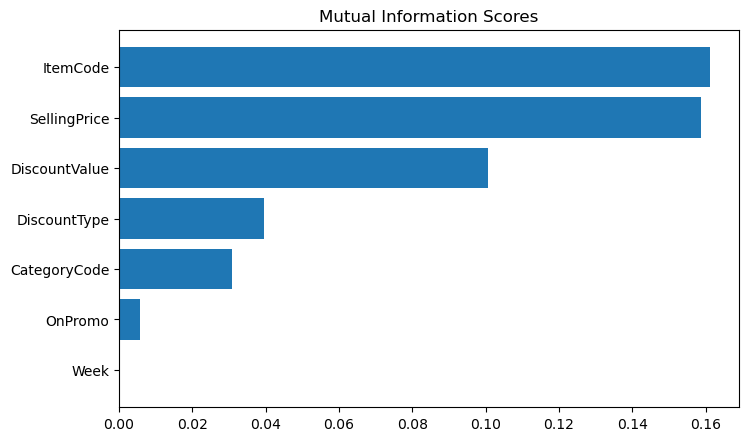

In [860]:
import numpy as np

import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [828]:
df_only_promo.shape
# count = (df_only_promo['Week'] == 22).sum()
# count

(264, 8)

In [829]:

# dfff = pd.concat([week_df, df_promo_merge])
df_all= pd.merge(week_df, df_promo_merge, on=['ItemCode','Week'], how="left")
df_all['OnPromo']=1
df_all.shape

(4013, 8)

In [830]:
new = pd.concat([df_all, df_only_promo], ignore_index=True, sort=False)
new.sample(10)
new.shape

(4277, 8)

In [831]:
new.loc[new.duplicated(), :]

df_only_non_promo_train = new.drop_duplicates(keep=False)
df_only_non_promo_train.shape
df_only_non_promo_train = df_only_non_promo_train[['CategoryCode','ItemCode','Week','WeeklySales']]
df_only_non_promo_train['OnPromo']=0
df_only_non_promo_train

,CategoryCode,ItemCode,Week,WeeklySales,OnPromo
0,1,3418,15,83,0
1,1,3427,15,66,0
2,3,7666,15,15,0
3,2,9925,15,8,0
4,3,16936,15,74,0
...,...,...,...,...,...
4008,3,1101661,14,31,0
4009,2,1103056,14,14,0
4010,2,1105009,14,3,0
4011,2,1105018,14,15,0


In [832]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(leaf_size = 5, n_neighbors=3)

knn2.fit(df_only_promo.drop(columns=['WeeklySales']),df_only_promo.WeeklySales.astype('int'))

KNeighborsClassifier(leaf_size=5, n_neighbors=3)

In [833]:
knn2.fit(df_only_non_promo_train.drop(columns=['WeeklySales']),df_only_non_promo_train.WeeklySales.astype('int'))

KNeighborsClassifier(leaf_size=5, n_neighbors=3)

In [834]:
df_val = pd.read_csv("./validation_data.csv")
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryCode  373 non-null    object
 1   ItemCode      373 non-null    int64 
 2   Week          373 non-null    object
 3   OnPromo       373 non-null    int64 
 4   WeeklySales   373 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.7+ KB


In [835]:
df_val.head()

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales
0,category_2,1006090,w1,0,9
1,category_2,1105009,w1,0,15
2,category_2,1098502,w3,0,7
3,category_1,1081321,w3,0,25
4,category_4,1074823,w1,0,24


In [836]:
df_val['CategoryCode']=df_val.CategoryCode.str.split(pat='_',expand=True)[1]
df_val

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales
0,2,1006090,w1,0,9
1,2,1105009,w1,0,15
2,2,1098502,w3,0,7
3,1,1081321,w3,0,25
4,4,1074823,w1,0,24
...,...,...,...,...,...
368,2,40759,w1,0,52
369,2,1006090,w2,0,20
370,1,1090303,w1,0,12
371,2,1090276,w3,0,8


In [837]:
df_val.replace("w1", 22,inplace=True)
df_val.replace("w2", 23,inplace=True)
df_val.replace("w3", 24,inplace=True)
df_val.replace("w4", 25,inplace=True)
df_val

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales
0,2,1006090,22,0,9
1,2,1105009,22,0,15
2,2,1098502,24,0,7
3,1,1081321,24,0,25
4,4,1074823,22,0,24
...,...,...,...,...,...
368,2,40759,22,0,52
369,2,1006090,23,0,20
370,1,1090303,22,0,12
371,2,1090276,24,0,8


In [838]:
df_only_promo_val= pd.merge(df_val[df_val['OnPromo'].astype('int') == 1], df_promo_merge, on=['ItemCode','Week'])
df_only_promo_val


,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,DiscountValue,DiscountType,SellingPrice
0,2,30877,23,1,121,10,1,70
1,2,1090258,24,1,61,10,1,140
2,3,1066570,23,1,124,15,1,45
3,1,1085749,22,1,17,10,1,70
4,2,50785,24,1,72,10,1,65
5,2,1101571,25,1,17,10,1,150
6,2,1090258,23,1,27,10,1,140
7,2,50785,22,1,39,10,1,65
8,2,64978,23,1,22,10,1,250
9,3,1066570,25,1,41,15,1,45


In [839]:
from sklearn.metrics import mean_absolute_percentage_error



knn_only_promo = KNeighborsClassifier(leaf_size = 5, n_neighbors=3)

knn_only_promo.fit(df_only_promo.drop(columns=['WeeklySales']),df_only_promo.WeeklySales.astype('int'))

y_test = df_only_promo_val.WeeklySales.astype('int')
y_pred = knn_only_promo.predict(df_only_promo_val.drop(columns=['WeeklySales']))

mean_absolute_percentage_error(y_test, y_pred)

# for i in range(20):
#     print(df_only_promo_val.drop(columns=['WeeklySales','OnPromo']).iloc[[i]],y_pred[i],y_test[i])

0.5688598066816456

In [840]:
df_val[df_val['OnPromo'].astype('int') == 0]

knn_non_promo = KNeighborsClassifier(leaf_size = 5, n_neighbors=3)
knn_non_promo.fit(df_only_non_promo_train.drop(columns=['WeeklySales']),df_only_non_promo_train.WeeklySales.astype('int'))
                  
y_test2 =  (df_val[df_val['OnPromo'].astype('int') == 0]).WeeklySales.astype('int')
y_pred2 = knn_non_promo.predict((df_val[df_val['OnPromo'].astype('int') == 0]).drop(columns=['WeeklySales']))

y_test_last = y_test.append(y_test2)
y_pred_last = np.concatenate((y_pred, y_pred2), axis=0)

mean_absolute_percentage_error(y_test_last, y_pred_last)

0.622697408694563

In [841]:


y_test = df_val.WeeklySales.astype('int')
y_pred = knn2.predict(df_val.drop(columns=['WeeklySales']))
mean_absolute_percentage_error(y_test, y_pred)

0.6300733475651837

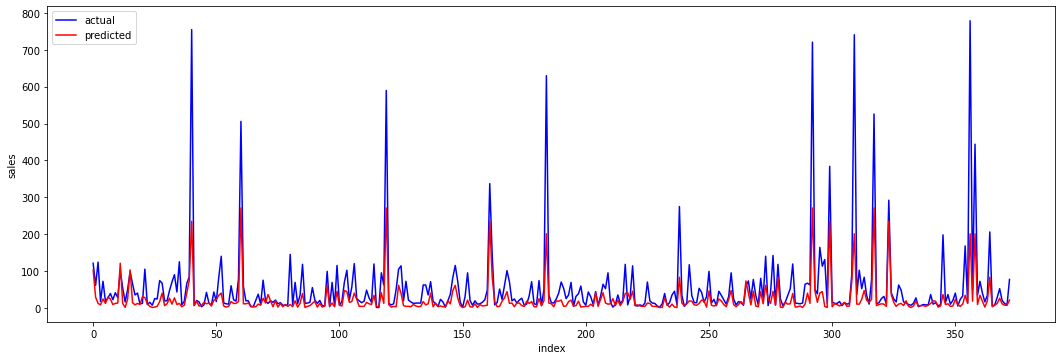

62.2697408694563

In [861]:
import numpy as np

def plotTwoCurves(x1,x2,y1,y2,xlable,ylabel,clabel1,clabel2):
    fig, ax = plt.subplots(figsize=(20, 6))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    ax.plot(x1,y1,color='blue',label=clabel1)
    ax.plot(x2,y2,color='red',label=clabel2)
    ax.set_xlabel(xlable)
    ax.set_ylabel(ylabel)
    plt.legend()
    plt.show()
    
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    plotTwoCurves(range(373),range(373),actual,pred,"index","sales","actual","predicted")
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_test_last, y_pred_last)

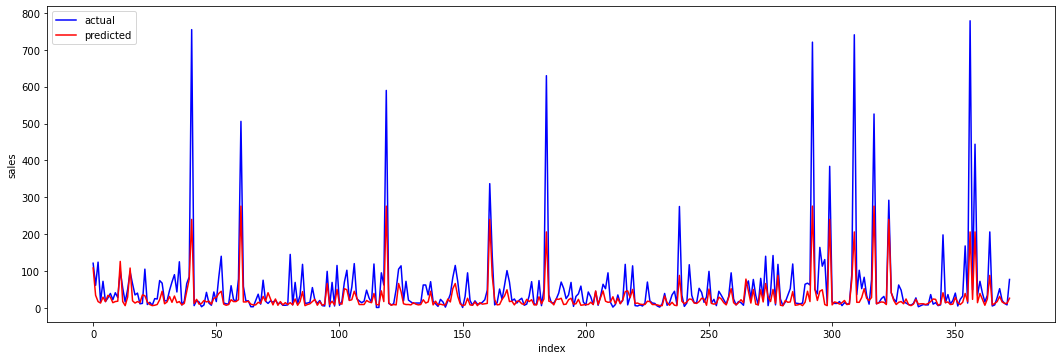

61.79328854933126


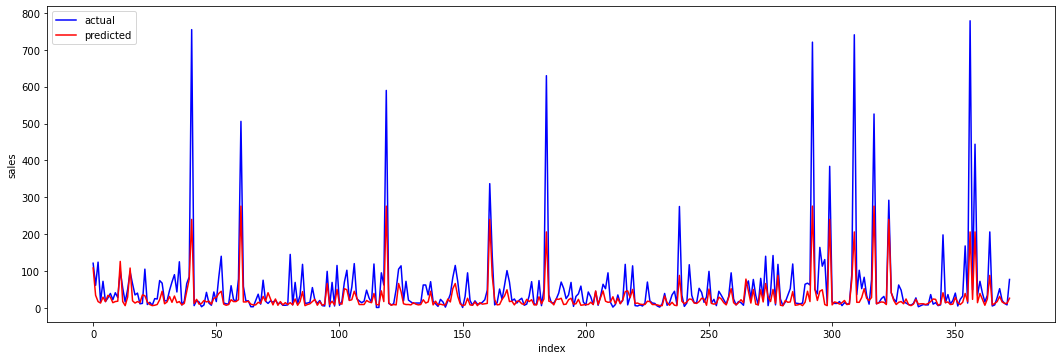

61.79328854933126

In [862]:
buffer = 0

def under_mape(actual, pred): 
    global buffer
    actual, pred = np.array(actual), np.array(pred)
    sum=0
    err_arr=[]
    for i in range(len(actual)):
        if pred[i] < actual[i]:
            err_arr.append(np.abs(pred[i] - actual[i]))
            sum = sum + np.abs(pred[i] - actual[i])
    
    buffer = np.mean(err_arr) + 2*np.std(err_arr)
    return (sum / np.sum(actual) * 100)


y_pred_new = [x+5 for x in y_pred_last]
print(mape(y_test_last, y_pred_new))
under_mape(y_test_last, y_pred_new)
# print(y_pred[0],y_pred_new[0])
# under_mape(y_test, y_pred)
# y_pred_new = [x+buffer for x in y_pred]
# print(y_pred[0],y_pred_new[0])
# print("under",under_mape(y_test, y_pred_new))
mape(y_test_last, y_pred_new)

In [844]:
#import dataset from local device

df_test = pd.read_csv("./test_data.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CategoryCode    377 non-null    object 
 1   ItemCode        377 non-null    int64  
 2   Week            377 non-null    object 
 3   OnPromo         377 non-null    int64  
 4   PredictedSales  0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 14.9+ KB


In [845]:
df_test.head()

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,w4,0,NaN
1,category_1,43738,w4,0,NaN
2,category_2,1044502,w1,0,NaN
3,category_2,913561,w4,0,NaN
4,category_2,216151,w4,0,NaN


In [846]:
df_test['CategoryCode']=df_test.CategoryCode.str.split(pat='_',expand=True)[1]
df_test

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,1,1048975,w4,0,NaN
1,1,43738,w4,0,NaN
2,2,1044502,w1,0,NaN
3,2,913561,w4,0,NaN
4,2,216151,w4,0,NaN
...,...,...,...,...,...
372,2,20824,w3,0,NaN
373,2,130993,w3,1,NaN
374,1,35449,w4,0,NaN
375,2,1010068,w1,0,NaN


In [847]:
df_test.replace("w1", 22,inplace=True)
df_test.replace("w2", 23,inplace=True)
df_test.replace("w3", 24,inplace=True)
df_test.replace("w4", 25,inplace=True)
df_test

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,1,1048975,25,0,NaN
1,1,43738,25,0,NaN
2,2,1044502,22,0,NaN
3,2,913561,25,0,NaN
4,2,216151,25,0,NaN
...,...,...,...,...,...
372,2,20824,24,0,NaN
373,2,130993,24,1,NaN
374,1,35449,25,0,NaN
375,2,1010068,22,0,NaN


In [848]:
df_only_promo_test= pd.merge(df_test[df_test['OnPromo'].astype('int') == 1], df_promo_merge, on=['ItemCode','Week'])
df_only_promo_test

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,DiscountValue,DiscountType,SellingPrice
0,3,1064572,23,1,NaN,10,1,370
1,2,1076929,22,1,NaN,10,1,280
2,2,1010068,24,1,NaN,10,1,170
3,2,87559,23,1,NaN,10,1,140
4,2,130993,22,1,NaN,10,1,70
5,2,836152,22,1,NaN,10,1,70
6,2,20824,25,1,NaN,10,1,80
7,2,1071124,23,1,NaN,10,1,63
8,2,130993,23,1,NaN,10,1,70
9,1,1048975,22,1,NaN,10,1,70


In [849]:
df_only_promo_test['PredictedSales'] = knn_only_promo.predict(df_only_promo_test.drop(columns=['PredictedSales']))
df_only_promo_test['PredictedSales'] = df_only_promo_test['PredictedSales'] + 5
df_only_promo_test

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,DiscountValue,DiscountType,SellingPrice
0,3,1064572,23,1,17,10,1,370
1,2,1076929,22,1,6,10,1,280
2,2,1010068,24,1,19,10,1,170
3,2,87559,23,1,37,10,1,140
4,2,130993,22,1,30,10,1,70
5,2,836152,22,1,38,10,1,70
6,2,20824,25,1,78,10,1,80
7,2,1071124,23,1,126,10,1,63
8,2,130993,23,1,30,10,1,70
9,1,1048975,22,1,19,10,1,70


In [850]:
df_test

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,1,1048975,25,0,NaN
1,1,43738,25,0,NaN
2,2,1044502,22,0,NaN
3,2,913561,25,0,NaN
4,2,216151,25,0,NaN
...,...,...,...,...,...
372,2,20824,24,0,NaN
373,2,130993,24,1,NaN
374,1,35449,25,0,NaN
375,2,1010068,22,0,NaN


In [851]:
df_tets_nonpromo = df_test[df_test['OnPromo'].astype('int') == 0]
df_tets_nonpromo['PredictedSales'] =5 + knn_non_promo.predict((df_test[df_test['OnPromo'].astype('int') == 0]).drop(columns=['PredictedSales']))
df_tets_nonpromo.head(30)

C:\Users\Abi\AppData\Local\Temp/ipykernel_19836/1979663684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tets_nonpromo['PredictedSales'] =5 + knn_non_promo.predict((df_test[df_test['OnPromo'].astype('int') == 0]).drop(columns=['PredictedSales']))


,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,1,1048975,25,0,19
1,1,43738,25,0,15
2,2,1044502,22,0,12
3,2,913561,25,0,6
4,2,216151,25,0,8
5,1,371239,24,0,9
6,2,1076929,25,0,11
7,2,23569,24,0,17
8,1,1032550,23,0,10
9,3,1063600,25,0,10


In [852]:
df_only_promo_test2 = df_only_promo_test[['CategoryCode','ItemCode','Week','OnPromo','PredictedSales']]
df_only_promo_test2

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,3,1064572,23,1,17
1,2,1076929,22,1,6
2,2,1010068,24,1,19
3,2,87559,23,1,37
4,2,130993,22,1,30
5,2,836152,22,1,38
6,2,20824,25,1,78
7,2,1071124,23,1,126
8,2,130993,23,1,30
9,1,1048975,22,1,19


In [853]:
for index,row in df_test.iterrows():
#     print(str(row['CategoryCode'])+ str(row['ItemCode']) + str(row['Week']) + str(row['OnPromo']))
    if row['OnPromo']==1:
        for j,row2 in df_only_promo_test2.iterrows():
            if (str(row['CategoryCode'])+ str(row['ItemCode']) + str(row['Week']) + str(row['OnPromo']))==(str(row2['CategoryCode'])+ str(row2['ItemCode']) + str(row2['Week']) + str(row2['OnPromo'])):
                
                row['PredictedSales'] = row2['PredictedSales']
                df_test.at[index,'PredictedSales'] = int(row['PredictedSales'])
                break

    else:
        for j,row2 in df_tets_nonpromo.iterrows():
            if (str(row['CategoryCode'])+ str(row['ItemCode']) + str(row['Week']) + str(row['OnPromo']))==(str(row2['CategoryCode'])+ str(row2['ItemCode']) + str(row2['Week']) + str(row2['OnPromo'])):
                row['PredictedSales'] = row2['PredictedSales']
                df_test.at[index,'PredictedSales'] = int(row['PredictedSales'])
                break
#     df_test['PredictedSales'] = df_test['PredictedSales'].replace(to_replace = np.nan, value =row['PredictedSales'])
    


In [854]:
df_test['PredictedSales'] = df_test['PredictedSales'].astype('int64') 
df_test.head(5)

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,1,1048975,25,0,19
1,1,43738,25,0,15
2,2,1044502,22,0,12
3,2,913561,25,0,6
4,2,216151,25,0,8


In [855]:
df_test['CategoryCode'] = "category_" + df_test['CategoryCode']
df_test

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,25,0,19
1,category_1,43738,25,0,15
2,category_2,1044502,22,0,12
3,category_2,913561,25,0,6
4,category_2,216151,25,0,8
...,...,...,...,...,...
372,category_2,20824,24,0,141
373,category_2,130993,24,1,30
374,category_1,35449,25,0,8
375,category_2,1010068,22,0,9


In [856]:
df_test['Week'] = "w"+(df_test['Week'].astype('int64') - 21).astype(str)


In [857]:
df_test.sample(5)

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
44,category_1,1075651,w2,0,10
76,category_1,1015621,w4,0,10
214,category_2,267496,w2,0,9
73,category_2,1067092,w2,0,72
186,category_2,1026871,w2,0,6


In [859]:
df_test

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,w4,0,19
1,category_1,43738,w4,0,15
2,category_2,1044502,w1,0,12
3,category_2,913561,w4,0,6
4,category_2,216151,w4,0,8
...,...,...,...,...,...
372,category_2,20824,w3,0,141
373,category_2,130993,w3,1,30
374,category_1,35449,w4,0,8
375,category_2,1010068,w1,0,9


In [866]:

df_test.to_csv("semi_finals_test.csv", index = False)
